In [ ]:
! pip install torchxrayvision

In [472]:
import torchxrayvision as xrv
import skimage, torch, torchvision
import torch

import torchvision.transforms as transforms

## load datasat

In [163]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])

Setting XRayResizer engine to cv2 could increase performance.


In [165]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/Users/jiashuoli/Desktop/thesis/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False)

In [166]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP'] data_aug=None

In [441]:
index = 279

In [442]:
d_nih.csv.iloc[index]

index                                       279
Image Index                    00000061_015.png
Finding Labels                        Pneumonia
Follow-up #                                  15
Patient ID                                   61
Patient Age                                  77
Patient Gender                                M
View Position                                AP
OriginalImage[Width                        3056
Height]                                    2544
OriginalImagePixelSpacing[x               0.139
y]                                        0.139
view                                         AP
has_masks                                 False
patientid                                    61
age_years                                  77.0
sex_male                                   True
sex_female                                False
Name: 279, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 1.0,
 'Pneumothorax': 0.0}

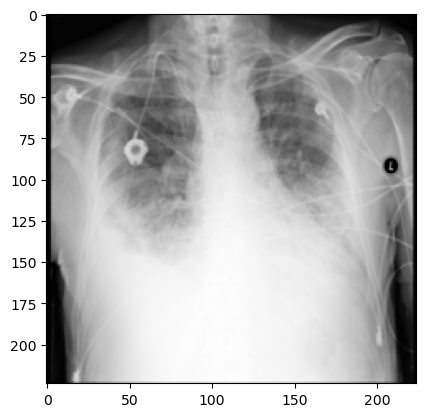

In [443]:
sample = d_nih[index]
plt.imshow(sample["img"][0], cmap="Greys_r")
dict(zip(d_nih.pathologies,sample["lab"]))

In [444]:
print(sample)

{'idx': 279, 'lab': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32), 'img': array([[[-1024.     , -1024.     , -1015.9686 , ...,  -991.8745 ,
         -1015.9686 , -1024.     ],
        [-1024.     , -1024.     , -1015.9686 , ...,  -991.8745 ,
         -1015.9686 , -1024.     ],
        [-1024.     , -1024.     , -1015.9686 , ...,  -991.8745 ,
         -1015.9686 , -1024.     ],
        ...,
        [-1024.     , -1024.     ,  -999.9059 , ...,  -951.71765,
          -991.8745 , -1024.     ],
        [-1024.     , -1024.     ,  -999.9059 , ...,  -943.6863 ,
          -991.8745 , -1024.     ],
        [-1024.     , -1024.     , -1007.93726, ...,  -967.7804 ,
          -999.9059 , -1024.     ]]], dtype=float32)}


In [445]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")


(224, 224)
Setting XRayResizer engine to cv2 could increase performance.


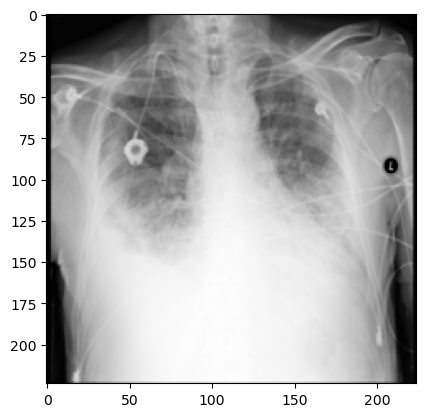

In [446]:
# Prepare the image:
nameIndex = "00000061_015"
img = skimage.io.imread("/Users/jiashuoli/Desktop/thesis/NIH/images-224/"+nameIndex+".png",as_gray=True)
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
print(img.shape)
plt.imshow(img, cmap="Greys_r")
transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])

img_transform = transform(img)
img_torch = torch.from_numpy(img_transform)

In [447]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [448]:
outputs

tensor([[0.5690, 0.5434, 0.5391, 0.5174, 0.5207, 0.5111, 0.5204, 0.5809, 0.5501,
         0.5647, 0.5554, 0.5253, 0.5874, 0.3286, 0.4770, 0.5195, 0.6118, 0.5968]],
       grad_fn=<IndexPutBackward0>)

In [ ]:

!pip install torchvision matplotlib

In [ ]:
!pip install torchcam

In [424]:
%matplotlib inline
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

In [425]:
model.eval()


XRV-DenseNet121-densenet121-res224-all

In [426]:
model

XRV-DenseNet121-densenet121-res224-all

In [427]:
model.features

Sequential(
  (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [449]:
cam_extractor = LayerCAM(model = model,target_layer=model.features.denseblock4,input_shape=(1,224,224))

In [450]:
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [451]:
print(outputs)

tensor([[0.5690, 0.5434, 0.5391, 0.5174, 0.5207, 0.5111, 0.5204, 0.5809, 0.5501,
         0.5647, 0.5554, 0.5253, 0.5874, 0.3286, 0.4770, 0.5195, 0.6118, 0.5968]],
       grad_fn=<IndexPutBackward0>)


In [452]:

# Retrieve the CAM by passing the class index and the model output
cams = cam_extractor(outputs.squeeze(0).argmax().item(), outputs)

torch.Size([1, 7, 7])


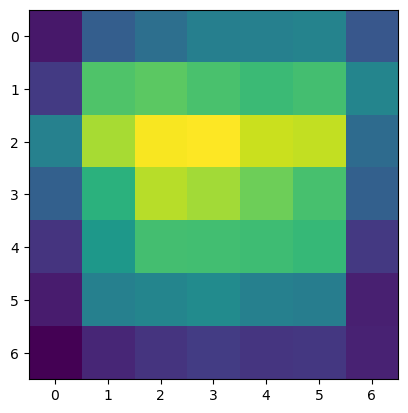

In [453]:

# Notice that there is one CAM per target layer (here only 1)
for cam in cams:
  print(cam.shape)
  plt.imshow(cam[0])
  # # Resize the CAM to the same size as the grayscale image
  # cam_resized = resize(cam.squeeze(), img.shape, anti_aliasing=True)

  # # Normalize the CAM to the range [0, 1]
  # cam_norm = (cam_resized - np.min(cam_resized)) / (np.max(cam_resized) - np.min(cam_resized))

  # # Apply a color map to the normalized CAM to generate a heatmap
  # heatmap = plt.cm.jet(cam_norm)

  # # Overlay the heatmap on top of the grayscale image
  # blended = 0.5 * heatmap[:, :, :3] + 0.5 * np.expand_dims(img, axis=2)

  # # Display the resulting heatmap
  # plt.imshow(blended)
  # plt.axis('off')
  # plt.show()

In [454]:
cam_resized = resize(cam.squeeze(), (224, 224))
print(cam_resized.shape)

(224, 224)


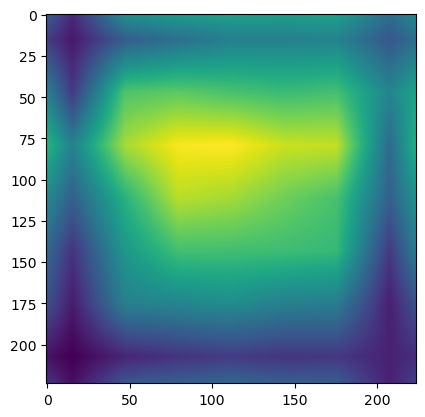

In [455]:
plt.imshow(cam_resized)

In [456]:
# read png picture

img1 = Image.open("/Users/jiashuoli/Desktop/thesis/NIH/images-224/"+nameIndex+".png")

# convert into numpy ndarray
img_array = np.array(img1)

#  create new empty RGB channel array
img_rgb1 = np.zeros((*img_array.shape, 3), dtype=np.uint8)

for i in range(3):
    img_rgb1[..., i] = img_array

print(img_rgb1.shape)

(224, 224, 3)


<class 'numpy.ndarray'>


True

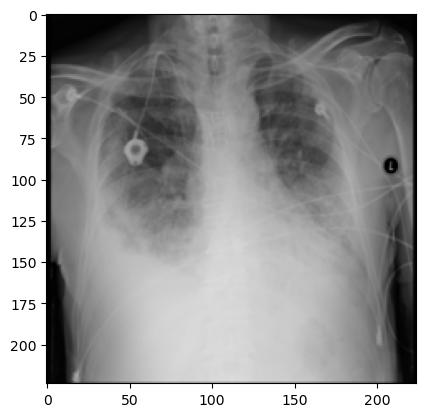

In [473]:
plt.imshow(img_rgb1)
print(type(img_rgb1))

#save the image
cv2.imwrite(nameIndex+".png", img_rgb1)

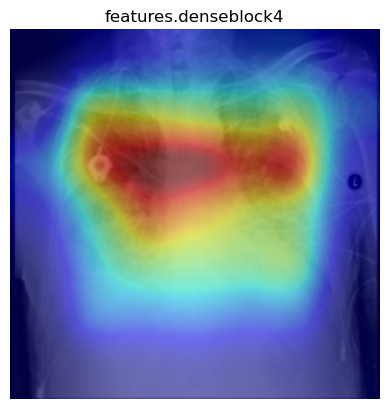

<class 'PIL.Image.Image'>


In [474]:

# Overlayed on the image
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img_rgb1), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()
  print(type(result))
#save the image
result.save(nameIndex+"_cam.png")